In [6]:
# standard python utilities
import os
from os.path import exists, join, basename, dirname
import sys
import glob
import pandas as pd
import numpy as np
import calendar
import time

# standard python plotting utilities
import matplotlib as mpl
import matplotlib.pyplot as plt

# standard geospatial python utilities
# import pyproj # for converting proj4string
# import shapely
import geopandas as gpd
# import gdal
# import rasterio
# from rasterio.plot import show
import richdem
from rasterstats import zonal_stats

# mapping utilities
import contextily as ctx
# import osmnx as ox # open street map
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm



ModuleNotFoundError: No module named 'gdal'

In [ ]:
doc_dir = os.getcwd()
while basename(doc_dir) != 'Documents':
    doc_dir = dirname(doc_dir)
# dir of all gwfm data
gwfm_dir = dirname(doc_dir)+'/Box/research_cosumnes/GWFlowModel'
gwfm_dir
dis_dir = join(gwfm_dir, 'DIS_data')
uzf_dir = join(gwfm_dir,'UZF_data')

In [ ]:
grid_p = gpd.read_file(gwfm_dir+'/DIS_data/grid/grid.shp')

m_domain = gpd.read_file(gwfm_dir+'/DIS_data/NewModelDomain/GWModelDomain_52_9deg_UTM10N_WGS84.shp')


In [ ]:
ag = gpd.read_file(join(uzf_path, 'county_landuse','domain_ag_lu_2018.shp'))
# subset for relevant columns
ag = ag[['geom_id','name','irr_name','geometry']]

In [3]:
proj_dir = box_dir+'/SESYNC_Paper1'
# parcel data for 2022 from Yusuke (Sacramento, San Joaquin), already clipped to domain
parcels = gpd.read_file(proj_dir+'/Parcels - All counties/parcels_all_counties_model.shp')
parcels = gpd.read_file(proj_dir+'/Parcels - Model/Parcels - Model.shp')
# change crs to utm zone 10
parcels = parcels.to_crs('epsg:32610')

NameError: name 'box_dir' is not defined

<Axes: >

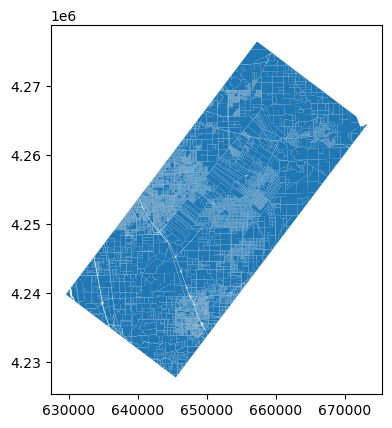

In [6]:
parcels.plot()

# Elevation zonal stats

In [96]:
# burn river shapefile into the 10 meter dem and then read it out to find the cells where it is
# Full size dem of northern sac valley
raster_name = gwfm_dir+"/DEM_data/USGS_ten_meter_dem/modeldomain_10m_transformed.tif"

# dem = rasterio.open(raster_name)
# dem_10m = dem.read((1,))[0,:,:]

# affine = dem.affine # didn't work
# affine = dem.meta['transform']

## Model Grid zonal stats

In [46]:
# create list of quantiles to take in zonal stats
quants = []
for n in np.arange(0,110,10).astype(str):
    quants.append('percentile_'+n)
stats = ['mean', 'median', 'majority','std'] + quants
stats

['mean',
 'median',
 'majority',
 'std',
 'percentile_0',
 'percentile_10',
 'percentile_20',
 'percentile_30',
 'percentile_40',
 'percentile_50',
 'percentile_60',
 'percentile_70',
 'percentile_80',
 'percentile_90',
 'percentile_100']

In [47]:
# takes several minutes
zs_grid = zonal_stats(grid_p, raster=raster_name, stats=stats)
# convert to dataframe
zs_df = pd.DataFrame(zs_grid)
# join zone stats of DEM to parcel data
zs_df = grid_p.join(zs_df)
# save to shapefile
zs_df.to_file(gwfm_dir+'/DIS_data/grid_elevation_m_statistics.shp')

C:\Users\ajcalder\Anaconda3\envs\all\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\ajcalder\AppData\Local\Temp\ipykernel_126224\1160635279.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  zs_df.to_file(gwfm_dir+'/DIS_data/grid_elevation_m_statistics.shp')


## Parcel zonal stats
Can be done for county parcels (all) or ag parcels only (for the economic model).

In [56]:
# runs quickly
# from rasterstats import gen_zonal_stats
# zs_gen = gen_zonal_stats(parcels, raster=raster_name, stats=['min', 'max', 'mean', 'median', 'majority','std'])

In [57]:
# takes some time again
# still not sure where it svaes
# from rasterstats.utils import stats_to_csv
# csv = stats_to_csv(zs_gen)
# assert csv.split()[0] == ','.join(sorted(VALID_STATS))

'majority,max,mean,median,min,std\r\n'

In [97]:
def elev_stats(raster_name, gdf, folder):
    # takes several minutes
    zs_parcels = zonal_stats(gdf, raster=raster_name, stats=['min', 'max', 'mean', 'median', 'majority','std'])
    # zonal_stats(parcels, dem_10m, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority', 'std'], nodata=-999)
    # convert to dataframe
    zs_df = pd.DataFrame(zs_parcels)
    # join zone stats of DEM to parcel data
    zs_df = parcels.join(zs_df)
    # save to shapefile
    zs_df.to_file(join(proj_dir, folder, 'parcel_elevation_m_statistics.shp'))
                  
# elev_stats(raster_name, parcels, 'parcel_zonalstats')
elev_stats(raster_name, ag, 'ag_parcel_zonalstats')

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

# Slope, Aspect zonal stats

In [98]:
# load DEM for slope/aspect analysis
rd_dem = richdem.LoadGDAL(raster_name)
# doesn't work without proper geotransform
# rd_dem = richdem.rdarray(dem_10m, no_data = dem.meta['nodata'], metadata = dem.meta)



In [110]:

def attr_stats(rd_dem, gdf, attr, folder):
    # calculate slope/aspect
    rd_attr = richdem.TerrainAttribute(rd_dem, attr)

    # takes several minutes
    zs_parcels = zonal_stats(gdf, rd_attr, affine=affine, nodata=rd_attr.no_data,
                stats=['min', 'max', 'mean', 'median', 'majority', 'std'])
    # zs_parcels = zonal_stats(parcels, raster=raster_name, stats=['min', 'max', 'mean', 'median', 'majority','std'])
    # convert to dataframe
    zs_df = pd.DataFrame(zs_parcels)
    # join zone stats of DEM to parcel data
    zs_df = gdf.join(zs_df)
    # save to shapefile
    zs_df.to_file(join(proj_dir, folder, attr+'_statistics.shp'))
    return(zs_df)


In [120]:
# attr = 'slope_percentage'
for attr in ['slope_percentage', 'slope_degrees', 'aspect']:
    slp = attr_stats(rd_dem, parcels, attr, 'parcel_zone_stats')

In [111]:
# attr = 'slope_percentage'
for attr in ['slope_percentage', 'slope_degrees', 'aspect']:
    slp = attr_stats(rd_dem, ag, attr, 'ag_parcel_zonalstats')

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:
C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  i

<AxesSubplot:>

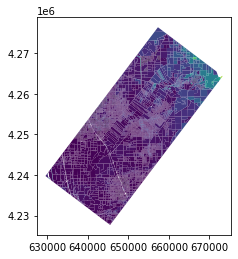

In [118]:
slp.plot('mean')

# Soil data
Join gridded data to parcel data to calculate the soil parameters at the parcel scale for irrigated lands only.


In [85]:
uzf_dir = gwfm_dir+'/UZF_data'
soil_path = join(uzf_dir,'clean_soil_data')


In [86]:
gpd_soil = gpd.read_file(join(soil_path, 'cleaned_spatial_soil.shp'))

In [8]:
# grid_uzf = gpd.read_file(uzf_path+'/final_grid_uzf/griduzf.shp')

In [ ]:
# need to decide with Yusuke, what parcels will the analysis actually be performed on
# I think the best would be the maximum extent of ag parcels from 2001,2018 combined
# need to see if the parcels within the county align with the ag parcels

# local QGIS review shows that the ag field data is more refined than parcels which makes sense
# because one parcel can have multiple fields

# and in some cases like at Teichert the parcels are long and skinny so the ag fields overlap them

# generally it probably makes most sense to use the ag parcels as they are the unit of relevance

# they are using the ag parcels

In [129]:
# only keep numeric columns that can be averaged (won't need texture class or HydGroup)
soil_ag = gpd.overlay(gpd_soil, ag)

In [140]:
from scipy.stats import mode
# calculate average soil parameters
soil_ag_cln = soil_ag.loc[:, soil_ag.columns!=object]
soil_ag_cln = soil_ag_cln.dissolve(['geom_id','name','irr_name'], np.mean)
# for objects use the mode
soil_ag_mode = soil_ag.dissolve(['geom_id','name','irr_name',], pd.Series.mode)

# add string cols back (texture, hydgroup)
soil_ag_cln = soil_ag_cln.join( soil_ag_mode[['Texture','HydGroup']]).reset_index()

C:\Users\ajcalder\Anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1676: FutureWarning: The operation <function mean at 0x00000264188E93F0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


In [152]:
soil_ag_cln['area_m2'] = soil_ag_cln.geometry.area

In [153]:
soil_ag_cln.drop(columns='geometry').to_csv(join(soil_path, 'soil_for_ag_fields.csv'))

In [142]:
# identify the grid cells that will be connected to each ag field
grid_soil = gpd.overlay(grid_p, soil_ag_cln)

# if there are multiple ag field in a cell then the recharge/pumping needs to be scaled by the ag field area within the cell
grid_soil['field_area'] = grid_soil.area

In [143]:
# save ag field - grid cell connection and area
grid_soil[['row','column', 'geom_id','name','irr_name','field_area']].to_csv(join(soil_path, 'ag_field_to_cell.csv'))

In [61]:
# there are some non-unique rows in the ag field dataset
soil_ag_cln.shape, ag.shape, ag.geom_id.unique().shape

((2448, 17), (2456, 4))

## Runoff coefficients

In [112]:
# load data for slope
# zs_df = gpd.read_file(join(dis_dir, 'grid_zonal_stats','slope_percentage_statistics.shp'))
zs_df = gpd.read_file(join(proj_dir, 'ag_parcel_zonalstats','slope_percentage_statistics.shp'))


In [144]:
soil_ag = soil_ag.assign(lu='Cultivated land')

In [146]:
# overlay crops geometry so cell area can be taken into account
C_gpd = pd.merge(soil_ag, zs_df[['geom_id','name','irr_name','mean']])

In [147]:
# load curve number data and clean up
CN = pd.read_excel(join(gwfm_dir,'UZF_data','curve_numbers.xlsx'), comment='#')
CN = CN.rename(columns={'Cover type':'lu', 'Impervious':'impervious', 'Hydrologic Condition':'HydCond'})

CN_long = CN.melt(id_vars = ['lu','impervious','HydCond'], var_name='HydGroup', value_name='CN')
# columns for joining
CN_long = CN_long[['HydGroup','lu','impervious', 'HydCond', 'CN']]

In [148]:
# join spatial data to ID data for Curve Numbers
CN_out = C_gpd.join(CN_long.set_index(['HydGroup','lu']), on=['HydGroup','lu'], how='inner')

# for pasture there is an option of fair or poor hydrologic condition
# poor condition should be associated with slopes greater than 3%, less than 50% cover in hills
CN_pasture = CN_out[CN_out.lu=='Pasture']
hills_pasture = CN_pasture[(CN_pasture['mean']>=3)&(CN_pasture.HydCond=='Poor')]
flat_pasture = CN_pasture[(CN_pasture['mean']<3)&(CN_pasture.HydCond=='Fair')]
CN_pasture = pd.concat((hills_pasture, flat_pasture))
# add pasture back to out file
CN_out = CN_out[CN_out.lu!='Pasture']
CN_out = pd.concat((CN_out, CN_pasture))

In [150]:
CN_out[['geom_id','name','irr_name','CN']].to_csv(join(soil_path, 'ag_field_CN.csv'))